In [8]:
import matplotlib.pyplot as plt
import torch
import pytorch_measure as pm
N = 1000 # number of weights
verbose = True
dev = 'cpu'

data = torch.randn(10000).to(dev)
#l = [min(data).item(), max(data).item()]
w = torch.softmax(torch.ones(N,dtype=torch.float),dim=-1).to(dev)
w = torch.nn.parameter.Parameter(w)
l = torch.linspace(-4, 4, N, requires_grad=False).to(dev)
# if l is min & max only
#index = [round((y.item() - l[0]) * (N - 1) / (l[1] - l[0])) for y in data]
# if l is all locations
index = torch.argmin(abs(l-data.view(-1,1)), dim=1)
def NLLLoss(m:list[pm.Measure]):
    mask = torch.zeros(len(m[0].weights), dtype=torch.bool)
    mask[m[0].support()] = 1
    return -m[0].weights[index].log()[mask[index]].sum()

sd = (data - l[index])**2
def WardLoss(w):
    return sum(sd * w[index])


Epoch: 0          Loss: 57762      LR: [0.1]
Epoch: 1          Loss: 55937      LR: [0.1]
Epoch: 2          Loss: 55686      LR: [0.1]
Epoch: 3          Loss: 55459      LR: [0.1]
Epoch: 4          Loss: 55259      LR: [0.1]
Epoch: 5          Loss: 55011      LR: [0.1]
Epoch: 6          Loss: 54804      LR: [0.1]
Epoch: 7          Loss: 54542      LR: [0.1]
Epoch: 8          Loss: 54322      LR: [0.1]
Epoch: 9          Loss: 54060      LR: [0.1]
Epoch: 10         Loss: 53767      LR: [0.1]
Epoch: 11         Loss: 53506      LR: [0.1]
Epoch: 12         Loss: 53293      LR: [0.1]
Epoch: 13         Loss: 53073      LR: [0.1]
Epoch: 14         Loss: 52825      LR: [0.1]
Epoch: 15         Loss: 52591      LR: [0.1]
Epoch: 16         Loss: 52378      LR: [0.1]
Epoch: 17         Loss: 52165      LR: [0.1]
Epoch: 18         Loss: 51885      LR: [0.1]
Epoch: 19         Loss: 51558      LR: [0.1]
Epoch: 20         Loss: 51230      LR: [0.1]
Epoch: 21         Loss: 50878      LR: [0.1]
Epoch: 22 

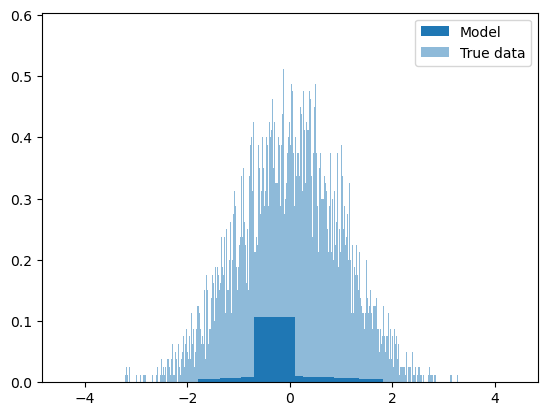

In [10]:
measure = pm.Measure(locations=l, weights=w, device=dev)
opt = pm.Optimizer([measure], lr=1e-1)
opt.minimize(NLLLoss, verbose=True, print_freq=1)

plt.bar(height=measure.weights.detach(),x=l)
plt.hist(torch.randn(10000),bins=N, density=True, range=[-4,4], alpha=0.5)
plt.legend(['Model','True data'])
plt.show()
